In [1]:
import os
import sys
from tqdm import tqdm
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_data(title,auroc1,auprc1,auroc2,auprc2):
    # x轴
    # x轴标签
    x_labels = ["D=2048", "D=1024", "D=512", "D=256"]
    # 绘制折线图
    plt.figure(figsize=(6, 4))
    plt.ylim(0.8, 1.0)
    # plt.plot(x_labels, acc, marker='o', label='Accuracy')
    plt.plot(x_labels, auroc1, marker='s', label='AUROC1')
    plt.plot(x_labels, auprc1, marker='^', label='AUPRC1')
    plt.plot(x_labels, auroc2, marker='x', label='AUROC2')
    plt.plot(x_labels, auprc2, marker='d', label='AUPRC2')

    # 图例、标题和轴标签
    plt.title(title, fontsize=14)
    plt.xlabel('Dimension', fontsize=12)
    plt.ylabel('Metrics Value', fontsize=12)
    plt.legend()
    # plt.grid(alpha=0.5)
    plt.xticks(x_labels)
    plt.tight_layout()

    # 显示图表
    plt.show()

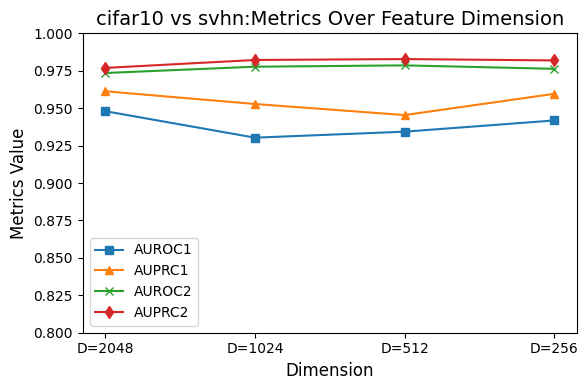

In [5]:
#cifar10 vs svhn
# acc = [0.9480,0.9504,0.9520,0.9540,]
auroc1 = [0.9480,0.9303,0.9343,0.9418]
auprc1 = [0.9613,0.9528,0.9454,0.9596,]
auroc2 = [0.9735,0.9777,0.9786,0.9763,]
auprc2 = [0.9769,0.9822,0.9828,0.9819]
plot_data('cifar10 vs svhn:Metrics Over Feature Dimension',auroc1,auprc1,auroc2,auprc2)

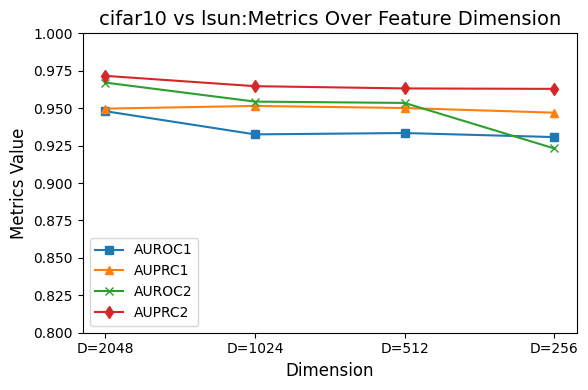

In [19]:
#cifar10 vs lsun 
# acc = [0.9365,0.9504,0.9520,0.9540,]
auroc1 = [0.9480,0.9325,0.9334,0.9307]
auprc1 = [0.9497,0.9515,0.9501,0.9470,]
auroc2 = [0.9671,0.9544,0.9535,0.9231,]
auprc2 = [0.9716,0.9647,0.9632,0.9629]
plot_data('cifar10 vs lsun:Metrics Over Feature Dimension',auroc1,auprc1,auroc2,auprc2)

In [ ]:
#cifar10 vs cifar100 
# acc = [0.9365,0.9504,0.9520,0.9540,]
auroc1 = [0.9068,0.9085,0.9081,0.9307]
auprc1 = [0.9257,0.9279,0.9231,0.9470,]
auroc2 = [0.9171,0.9203,0.9098,0.9231,]
auprc2 = [0.9312,0.9343,0.9201,0.9629]
plot_data('cifar10 vs lsun:Metrics Over Feature Dimension',auroc1,auprc1,auroc2,auprc2)

In [6]:
def simple_coroutine():
    print("开始协程")
    x = yield 42  # 挂起并返回 42
    print(f"协程恢复，接收到了: {x}")
    y = yield x  # 挂起并返回 x 的两倍
    print(f"协程恢复，接收到了: {y}")
    yield "结束"

# 创建生成器
print(1)
coro = simple_coroutine()
print(2)
# 启动协程
print(next(coro))  # 启动到第一个 yield，输出 42
print(3)
# 发送值并继续运行协程
# print(coro.send(10))  # x 接收 10，返回 20
print(next(coro))
print(4)
# 再次发送值
print(coro.send(30))  # y 接收 30，返回 "结束"


1
2
开始协程
42
3
协程恢复，接收到了: None
None
4
协程恢复，接收到了: 30
结束


In [7]:
import time
import heapq

# 简单的事件循环实现
class EventLoop:
    def __init__(self):
        self.tasks = []  # 使用一个优先队列存储任务 (time, generator)
    
    def call_later(self, delay, gen):
        """延迟执行生成器任务"""
        heapq.heappush(self.tasks, (time.time() + delay, gen))
    
    def run_forever(self):
        """事件循环主逻辑"""
        while self.tasks:
            now = time.time()
            # 获取队列中最早需要执行的任务
            next_time, gen = heapq.heappop(self.tasks)
            if next_time > now:  # 如果任务还未到执行时间
                time.sleep(next_time - now)
            
            try:
                # 运行任务到下一个 `yield`
                delay = next(gen)
                if delay is not None:
                    self.call_later(delay, gen)
            except StopIteration:
                # 协程完成，停止此任务
                pass

# 模拟异步任务
def async_task(name, delay):
    """模拟异步任务，使用 yield 返回下一次执行的延迟时间"""
    print(f"[{time.time():.2f}] Task {name}: Start")
    yield delay  # 模拟异步等待
    print(f"[{time.time():.2f}] Task {name}: End")

# 主程序
def main():
    loop = EventLoop()
    
    # 添加任务到事件循环
    loop.call_later(0, async_task("A", 2))  # 任务 A 延迟 2 秒完成
    loop.call_later(0, async_task("B", 3))  # 任务 B 延迟 3 秒完成
    loop.call_later(0, async_task("C", 1))  # 任务 C 延迟 1 秒完成
    
    print("[EventLoop] Starting...")
    loop.run_forever()
    print("[EventLoop] Done!")

if __name__ == "__main__":
    main()


[EventLoop] Starting...
[1731943947.15] Task A: Start
[1731943947.15] Task B: Start
[1731943947.15] Task C: Start
[1731943948.16] Task C: End
[1731943949.16] Task A: End
[1731943950.16] Task B: End
[EventLoop] Done!


In [1]:
a = [1,2]
def f(b):
    b.append(3)

print(a)
f(a)
print(a)
    

[1, 2]
[1, 2, 3]


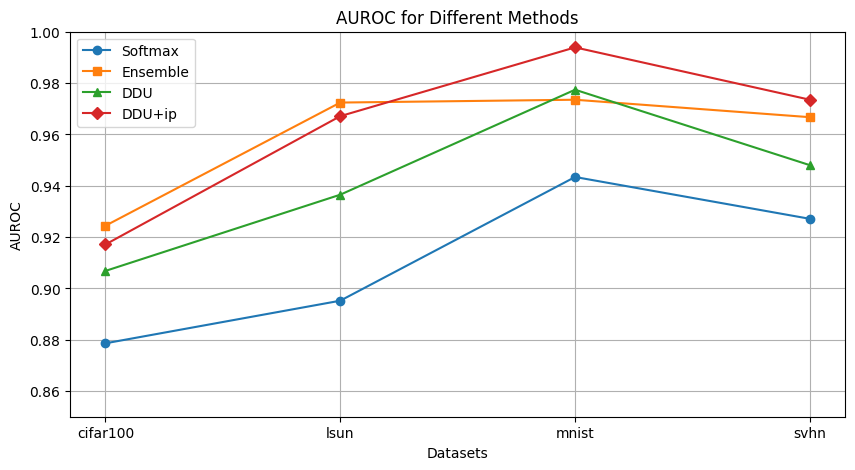

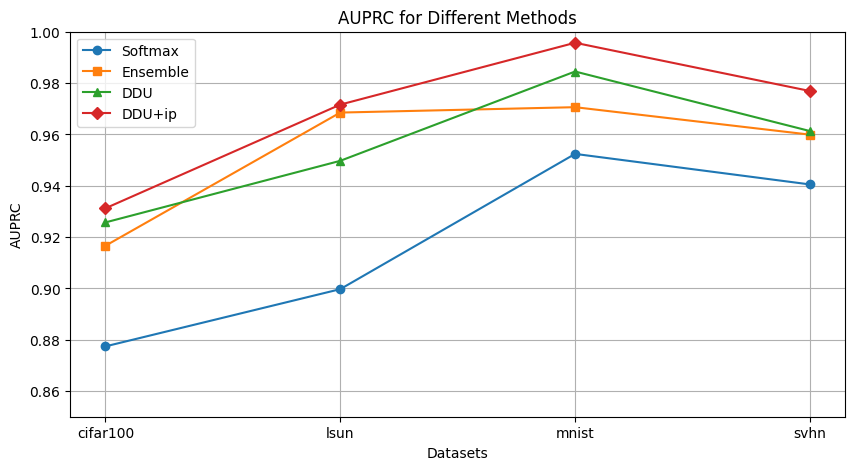

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 数据提取自表格
datasets = ['cifar100', 'lsun', 'mnist', 'svhn']

methods = ['Softmax', 'Ensemble', 'DDU', 'DDU+ip']
markers = ['o', 's', '^', 'D']  # 圆圈、方块、三角形、菱形
auroc_values = {
    'Softmax': [0.8786, 0.8952, 0.9434, 0.9271],
    'Ensemble': [0.9244, 0.9724, 0.9735, 0.9667],
    'DDU': [0.9068, 0.9365, 0.9774, 0.9480],
    'DDU+ip': [0.9171, 0.9671, 0.9939, 0.9735],
}
auprc_values = {
    'Softmax': [0.8774, 0.8997, 0.9524, 0.9405],
    'Ensemble': [0.9166, 0.9685, 0.9706, 0.9599],
    'DDU': [0.9257, 0.9497, 0.9845, 0.9613],
    'DDU+ip': [0.9312, 0.9716, 0.9957, 0.9769],
}

# 绘制 AUROC 折线图
plt.figure(figsize=(10, 5))
for method, marker in zip(methods, markers):
    plt.plot(datasets, auroc_values[method], marker=marker, label=method)

plt.title("AUROC for Different Methods")
plt.xlabel("Datasets")
plt.ylabel("AUROC")
plt.ylim(0.85, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# 绘制 AUPRC 折线图
plt.figure(figsize=(10, 5))
for method, marker in zip(methods, markers):
    plt.plot(datasets, auprc_values[method], marker=marker, label=method)

plt.title("AUPRC for Different Methods")
plt.xlabel("Datasets")
plt.ylabel("AUPRC")
plt.ylim(0.85, 1.0)
plt.grid(True)
plt.legend()
plt.show()
